In [1]:
#%pip install pandas
#%pip install scipy
#%pip install matplotlib
#%pip install seaborn
#%pip install scikit-learn
#%pip install umap-learn


In [2]:
import pandas as pd
#from google.colab import auth
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#auth.authenticate_user()

# Import Dataset

In [3]:
train_in = pd.read_csv("data/train_in.csv", header=None)
train_out = pd.read_csv("data/train_out.csv", header=None, names=["label"])
test_in = pd.read_csv("data/test_in.csv", header=None)
test_out = pd.read_csv("data/test_out.csv", header=None, names=["label"])

#train_in = pd.read_csv("/content/DL_assignment/train_in - Copy.csv", header=None)
#train_out = pd.read_csv("/content/DL_assignment/train_out - Copy.csv", header=None, names=["label"])
#test_in = pd.read_csv("/content/DL_assignment/test_in - Copy.csv", header=None)
#test_out = pd.read_csv("/content/DL_assignment/test_out - Copy.csv", header=None, names=["label"])

In [4]:
train_in.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [5]:
train_out.head()

,label
0,6
1,5
2,4
3,7
4,3


In [6]:
train_in.shape, train_out.shape

((1707, 256), (1707, 1))

In [7]:
train = pd.concat([train_in, train_out], axis=1)
test = pd.concat([test_in, test_out], axis=1)

#  Task 1: Data dimensionality, distance-based classifiers

## Subtask 1

In [8]:
grouped_labels = train.groupby('label')
average_points = grouped_labels.mean()

In [9]:
average_points

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
label,,,,,,,,,,,,,,,,,,,,,
0,-1.000000,-0.997524,-0.987003,-0.945918,-0.844044,-0.604991,-0.141621,0.161361,0.082251,-0.342887,...,0.289508,0.542160,0.444213,0.022950,-0.507881,-0.850539,-0.976881,-0.998734,-1.000000,-1.000000
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.996972,-0.661611,0.510294,0.030044,-0.901274,...,-0.849389,0.166083,0.553520,-0.593107,-0.979258,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,-0.986797,-0.941292,-0.876579,-0.804203,-0.629980,-0.406213,-0.242248,-0.191307,-0.360149,-0.674030,...,-0.530079,-0.679812,-0.783594,-0.844733,-0.850465,-0.825832,-0.773213,-0.775074,-0.851668,-0.948465
3,-1.000000,-0.989557,-0.917977,-0.728794,-0.378145,-0.045748,0.235366,0.424603,0.419053,0.123260,...,0.333496,0.378382,0.262832,-0.004893,-0.308008,-0.592107,-0.795198,-0.925282,-0.979122,-0.999473
4,-1.000000,-1.000000,-1.000000,-0.984016,-0.910434,-0.855426,-0.918049,-0.863639,-0.781008,-0.729377,...,-0.861836,-0.590828,-0.334426,-0.278828,-0.600361,-0.778877,-0.926730,-0.979664,-0.989631,-1.000000
5,-1.000000,-0.994852,-0.980898,-0.931909,-0.840636,-0.775227,-0.623273,-0.460739,-0.328909,-0.154477,...,0.110511,0.243409,0.225500,0.079545,-0.225330,-0.550636,-0.784170,-0.906341,-0.971966,-0.997909
6,-1.000000,-1.000000,-1.000000,-1.000000,-0.997404,-0.964040,-0.875828,-0.546066,-0.055894,-0.080397,...,0.374391,0.473755,0.250139,-0.195086,-0.643828,-0.870583,-0.962073,-0.993026,-1.000000,-1.000000
7,-0.985030,-0.900476,-0.777145,-0.619380,-0.434488,-0.279331,-0.208434,-0.189855,-0.090145,0.016741,...,-0.321090,0.106663,-0.236711,-0.793783,-0.955452,-0.997494,-1.000000,-1.000000,-1.000000,-1.000000
8,-0.999285,-0.974076,-0.917743,-0.822118,-0.617340,-0.278667,0.177389,0.386562,0.290319,-0.085993,...,0.050521,0.531792,0.582271,0.103076,-0.547979,-0.875514,-0.972472,-0.993299,-0.999986,-1.000000


In [10]:
dist_matrix = pdist(average_points, metric='euclidean')
dist_matrix = squareform(dist_matrix)

In [11]:
dist_matrix

array([[ 0.        , 14.44960797,  9.33455587,  9.14373367, 10.76984444,
         7.51929626,  8.15444313, 11.86455505,  9.90790174, 11.48887494],
       [14.44960797,  0.        , 10.12532258, 11.7332329 , 10.17378643,
        11.11880041, 10.61470037, 10.74315367, 10.08677677,  9.9320937 ],
       [ 9.33455587, 10.12532258,  0.        ,  8.17828489,  7.93254148,
         7.90679632,  7.33180754,  8.87253107,  7.07751618,  8.88774785],
       [ 9.14373367, 11.7332329 ,  8.17828489,  0.        ,  9.0876078 ,
         6.11875002,  9.30206473,  8.92240093,  7.02042489,  8.35435012],
       [10.76984444, 10.17378643,  7.93254148,  9.0876078 ,  0.        ,
         8.00151741,  8.78223265,  7.58301228,  7.38090899,  6.01040793],
       [ 7.51929626, 11.11880041,  7.90679632,  6.11875002,  8.00151741,
         0.        ,  6.69869172,  9.21195402,  6.96738648,  8.25853807],
       [ 8.15444313, 10.61470037,  7.33180754,  9.30206473,  8.78223265,
         6.69869172,  0.        , 10.8882374 

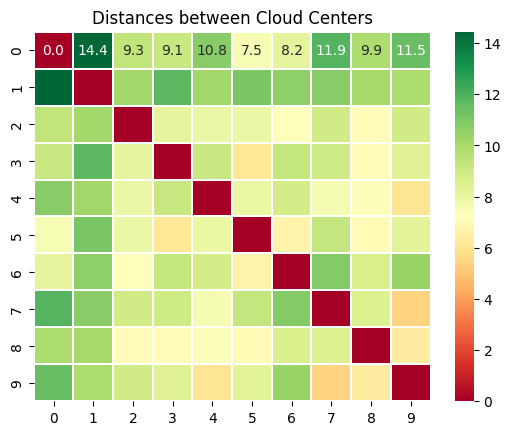

In [12]:
sns.heatmap(dist_matrix, annot=True, fmt=".1f", cmap='RdYlGn', linewidths=0.30).set(title='Distances between Cloud Centers');

The pair of numbers that are close to each other are the following: (3, 5); (5, 6); (4, 9); (7, 9); (8, 9).

## Subtask 2

In [13]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(train.drop(columns=["label"], inplace=False))
pca_train_df = pd.DataFrame(pca_train, columns=["x", "y"])
pca_train_df = pd.concat([pca_train_df, train["label"]], axis=1)
pca_train_df

,x,y,label
0,4.811395,-5.657783,6
1,6.619904,-1.025007,5
2,1.032756,2.203030,4
3,-2.485330,6.425826,7
4,2.261413,0.340735,3
...,...,...,...
1702,-3.179749,-0.593432,8
1703,-4.579916,1.134535,9
1704,-3.762636,5.429251,7
1705,-3.751409,2.300983,9


/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

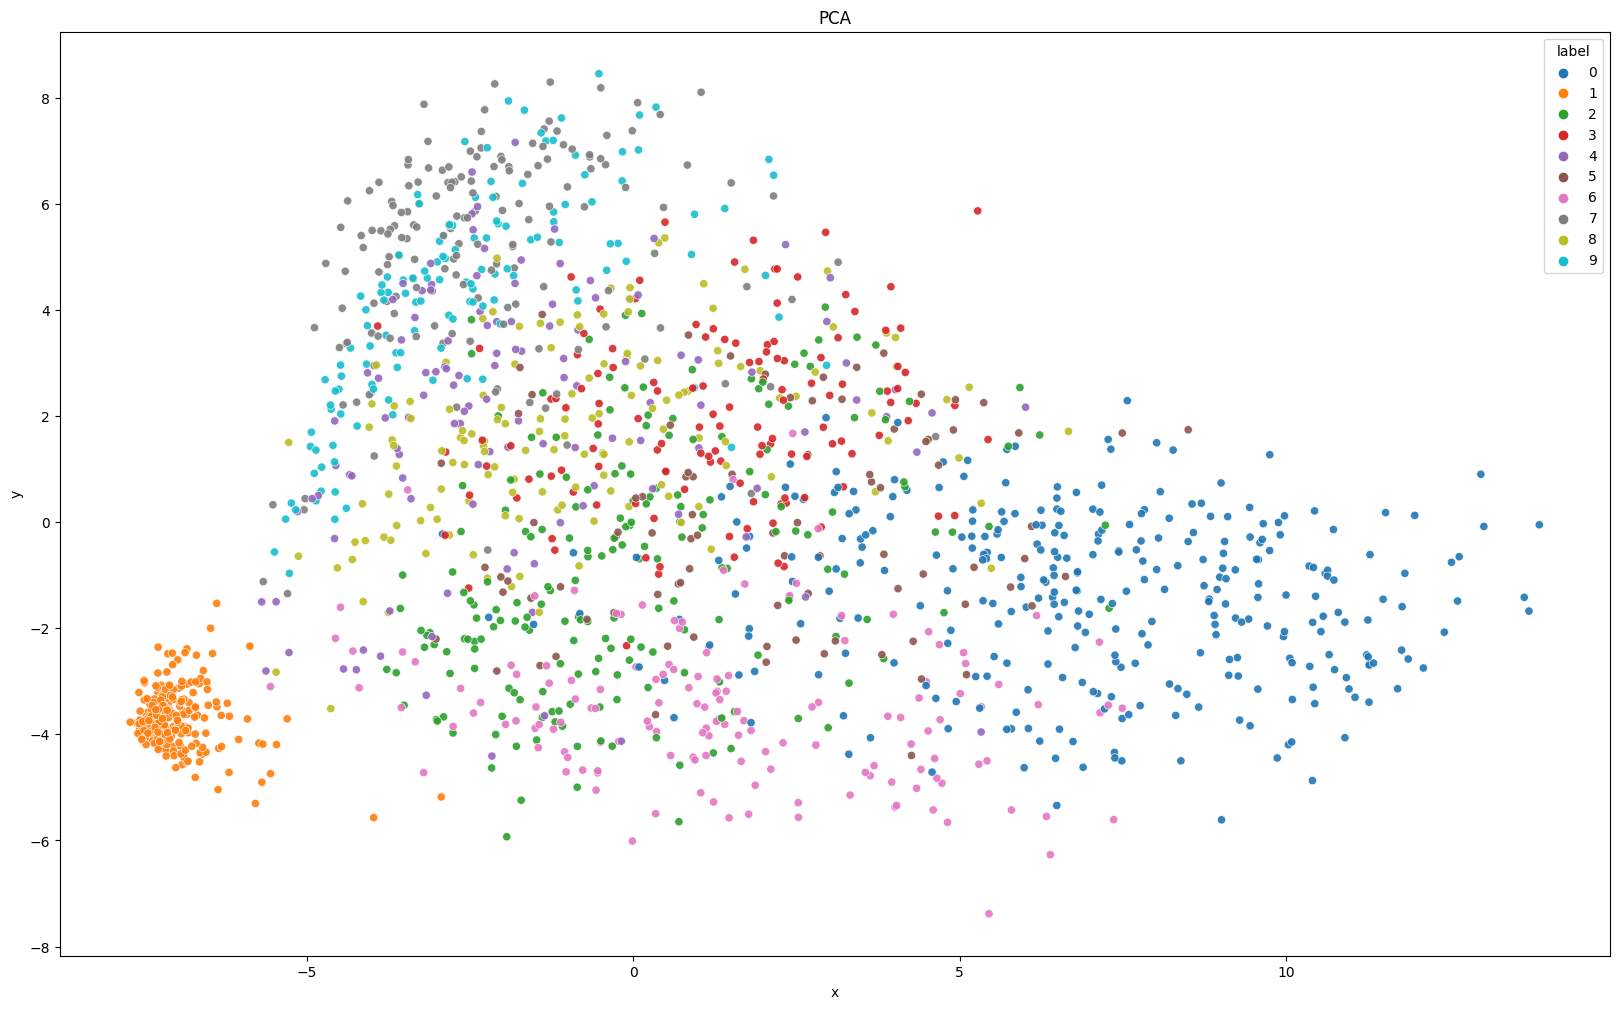

In [14]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=pca_train_df, x="x", y="y", hue="label", alpha=0.9, legend="full", palette="tab10").set(title='PCA');

In [15]:
tsne = TSNE(n_components=2)
tsne_train = tsne.fit_transform(train.drop(columns=["label"], inplace=False))
tsne_train_df = pd.DataFrame(tsne_train, columns=["x", "y"])
tsne_train_df = pd.concat([tsne_train_df, train["label"]], axis=1)
tsne_train_df

,x,y,label
0,19.911615,-32.184692,6
1,32.694347,10.783848,5
2,-27.737247,7.270615,4
3,-19.493191,28.481359,7
4,30.512787,19.350906,3
...,...,...,...
1702,1.249134,11.114622,8
1703,-20.959677,13.769573,9
1704,-20.934647,27.884546,7
1705,-21.115536,16.163969,9


/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

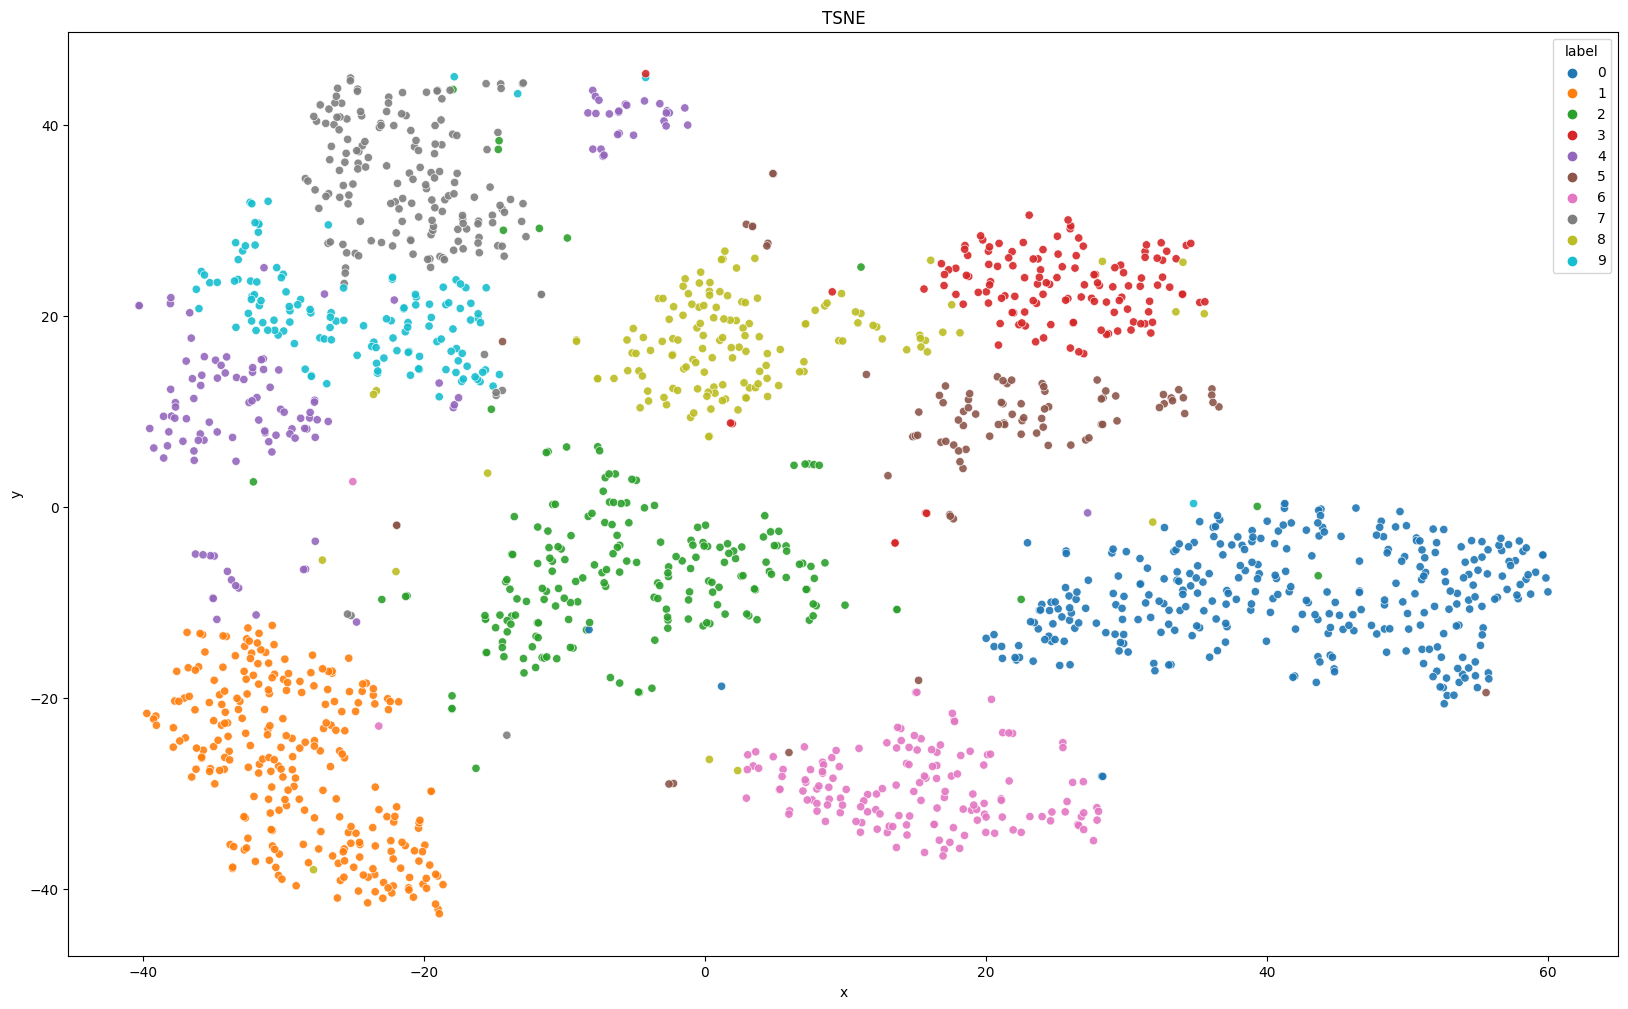

In [16]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=tsne_train_df, x="x", y="y", hue="label", alpha=0.9, legend="full", palette="tab10").set(title='TSNE');

In [17]:
umap_ = UMAP(n_components=2)
umap_train = umap_.fit_transform(train.drop(columns=["label"], inplace=False))
umap_train_df = pd.DataFrame(umap_train, columns=["x", "y"])
umap_train_df = pd.concat([umap_train_df, train["label"]], axis=1)
umap_train_df

,x,y,label
0,4.737434,7.630307,6
1,3.164537,3.966256,5
2,9.659643,-0.234111,4
3,10.705128,-2.907383,7
4,3.094552,3.119209,3
...,...,...,...
1702,5.065819,0.969070,8
1703,11.528506,-1.620737,9
1704,10.644175,-2.843790,7
1705,11.199309,-1.680468,9


/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vanba/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

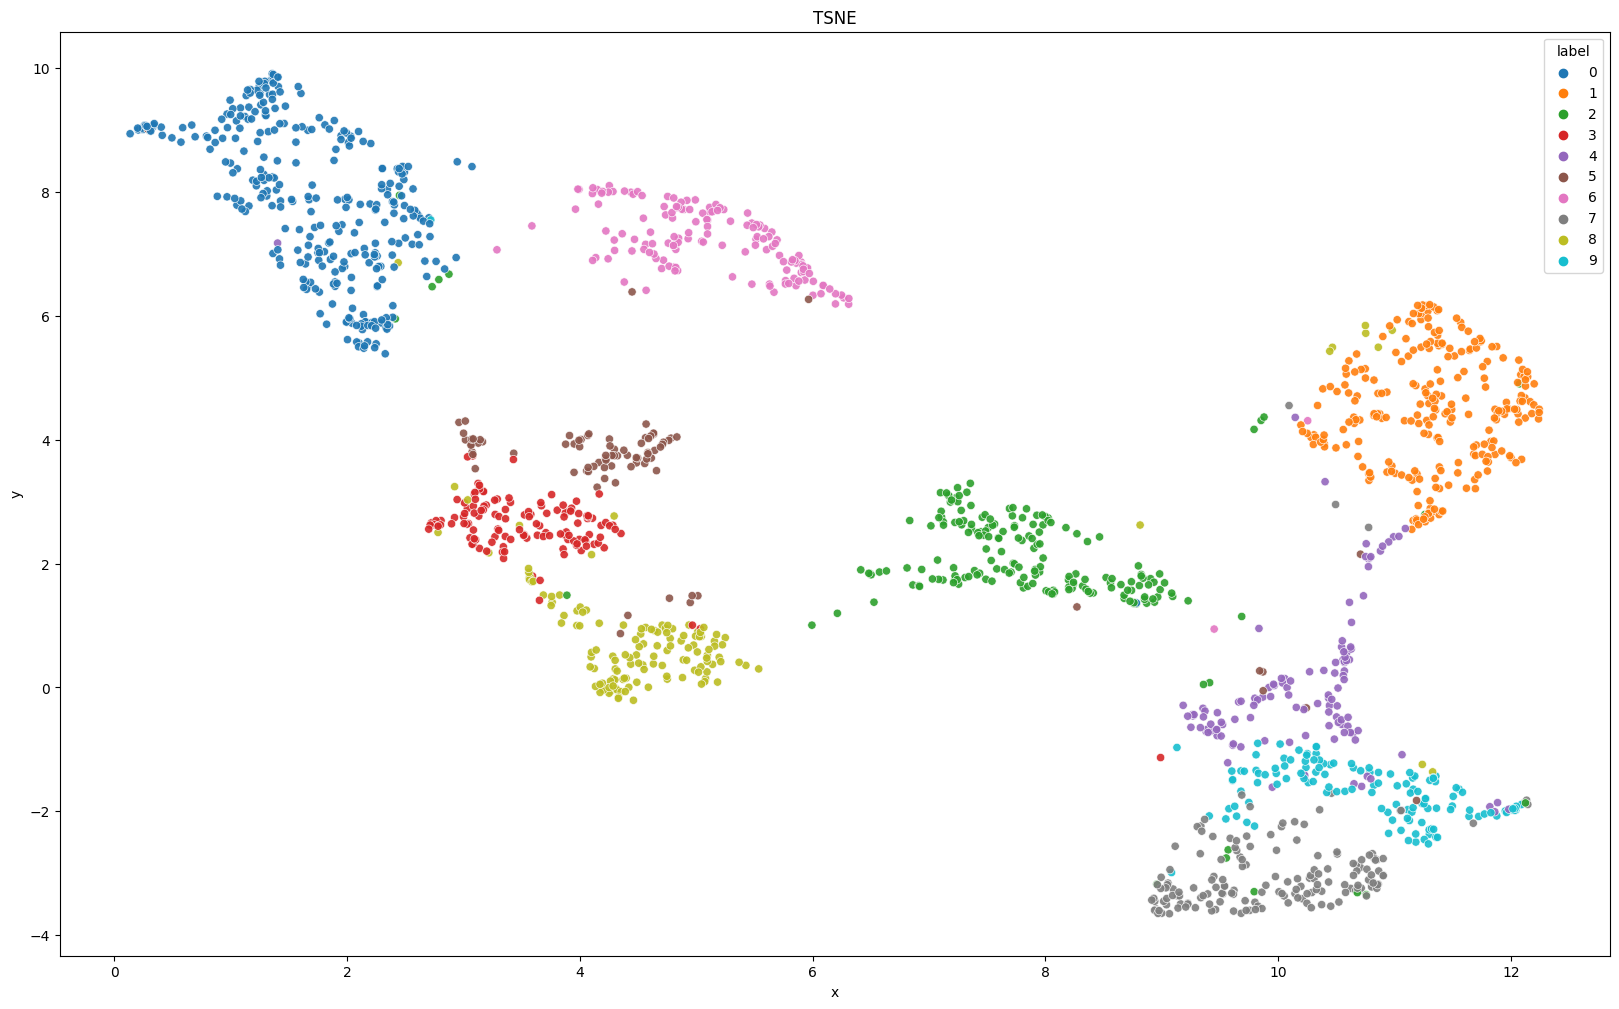

In [18]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=umap_train_df, x="x", y="y", hue="label", alpha=0.9, legend="full", palette="tab10").set(title='TSNE');

## Subtask 3

In [19]:
nmc = NearestCentroid()
nmc.fit(train_in, train_out.values.ravel())

print(f"Training Score: {nmc.score(train_in, train_out) * 100} %")
print(f"Test Score: {nmc.score(test_in, test_out) * 100} %")

Training Score: 86.35032220269478 %
Test Score: 80.4 %


## Subtask 4

In [20]:
knn = KNeighborsClassifier()
knn.fit(train_in, train_out.values.ravel())

print(f"Training Score: {knn.score(train_in, train_out) * 100} %")
print(f"Test Score: {knn.score(test_in, test_out) * 100} %")

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
nmc_test_pred = nmc.predict(test_in)
knn_test_pred = knn.predict(test_in)

In [ ]:
nmc_conf = confusion_matrix(test_out, nmc_test_pred, labels=range(0, 10))
sns.heatmap(nmc_conf, annot=True, fmt=".0f", cmap='RdYlGn', linewidths=0.30).set(title='Confusion Matrix for Nearest Mean Classifier');

In [ ]:
knn_conf = confusion_matrix(test_out, knn_test_pred, labels=range(0, 10))
sns.heatmap(knn_conf, annot=True, fmt=".0f", cmap='RdYlGn', linewidths=0.30).set(title='Confusion Matrix for K Neighbors Classifier');